In [ ]:
# https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/intro-to-the-geotiff-file-format/
#


In [ ]:
# Import necessary packages
import os
import rioxarray as rxr
import earthpy as et

# # Get data and set working directory
# et.data.get_data("colorado-flood")
# os.chdir(os.path.join(et.io.HOME,
#                       'earth-analytics',
#                       'data'))

In [ ]:
# Define relative path to file
lidar_dem_path = "/home/jovyan/work/occitanie_power-density_100m.tif"

pre_lidar_dem = rxr.open_rasterio(lidar_dem_path,
                                 masked=True)
pre_lidar_dem.rio.bounds()

In [ ]:
# View generate metadata associated with the raster file
print("The crs of your data is:", pre_lidar_dem.rio.crs)
print("The nodatavalue of your data is:", pre_lidar_dem.rio.nodata)
print("The shape of your data is:", pre_lidar_dem.shape)
print("The spatial resolution for your data is:", pre_lidar_dem.rio.resolution())
print("The metadata for your data is:", pre_lidar_dem.attrs)

In [ ]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")


In [ ]:
# lidar_dem_path = "/home/owin10k/w_hack/lab1/occitanie_power-density_100m.tif"

# # Open the file using a context manager ("with rio.open" statement)
# with rio.open(lidar_dem_path) as dem_src:
#     dtm_pre_arr = dem_src.read(1)

In [ ]:
# type(dtm_pre_arr)

In [ ]:
# ep.plot_bands(dtm_pre_arr,
#               title="Wind power",
#               cmap="Greys",  vmin=100, vmax=2000)

# plt.show()

In [ ]:
# type(dtm_pre_arr)

In [ ]:
# import pandas as pa
# pa.DataFrame(dtm_pre_arr)

In [8]:

import geopandas as gpd
import os

# path_to_data = gpd.datasets.get_path("a-reg2021.json")
gdf = gpd.read_file("/home/jovyan/work/a-reg2021.json")

site_bound_shp=gdf[gdf['libgeo']=='Occitanie'].iloc[0]['geometry']


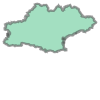

In [9]:
gdf = gpd.read_file('/home/jovyan/work/occitanie_2.geojson')
gdf.iloc[0]['geometry']


In [10]:
print('gdf: ', gdf.crs)
print('lidar crs: ', pre_lidar_dem.rio.crs)

gdf:  epsg:4326
lidar crs:  EPSG:4326


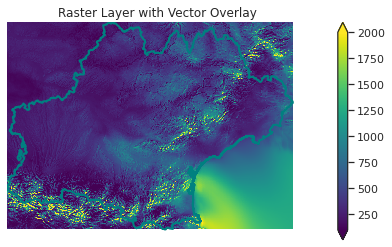

In [45]:
f, ax = plt.subplots(figsize=(11, 4))

pre_lidar_dem.squeeze().plot.imshow(cmap="viridis",
                        ax=ax, vmin=100, vmax=2000,)
gdf.plot(color='None', 
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax,
                    zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()

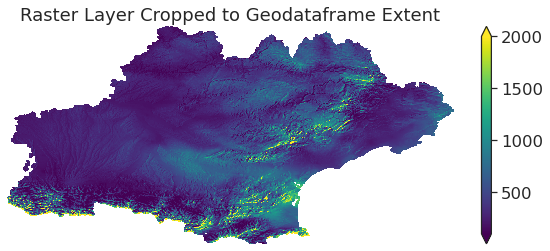

In [12]:
lidar_clipped = pre_lidar_dem.rio.clip(gdf.iloc[0]['geometry'])

f, ax = plt.subplots(figsize=(10, 4))
lidar_clipped.plot(ax=ax,  vmin=100, vmax=2000)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

In [13]:
communes_df = gpd.read_file('/home/jovyan/work/commune-occi.geojson')



In [14]:
communes_df[communes_df['nom']=='Toulouse']

insee       nom    wikipedia  surf_ha  \
3818  31555  Toulouse  fr:Toulouse  11802.0   

                                               geometry  
3818  MULTIPOLYGON (((1.35040 43.60427, 1.35065 43.6...

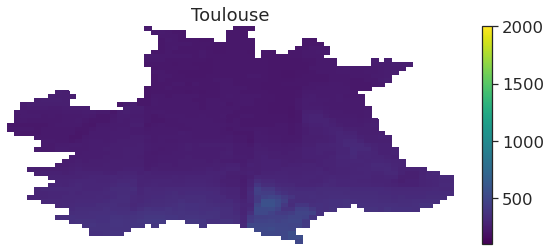

In [15]:
name='Toulouse'
toulouse_clipped = pre_lidar_dem.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])

f, ax = plt.subplots(figsize=(10, 4))
toulouse_clipped.plot(ax=ax,  vmin=100, vmax=2000)
ax.set(title=name)
ax.set_axis_off()
plt.show()

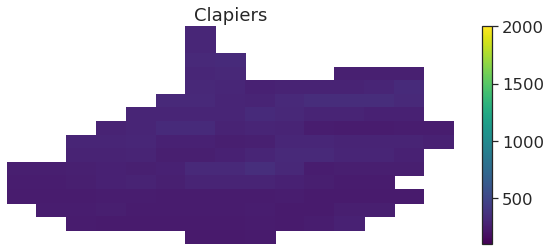

In [16]:
name='Clapiers'
toulouse_clipped = pre_lidar_dem.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])

f, ax = plt.subplots(figsize=(10, 4))
toulouse_clipped.plot(ax=ax,  vmin=100, vmax=2000)
ax.set(title=name)
ax.set_axis_off()
plt.show()

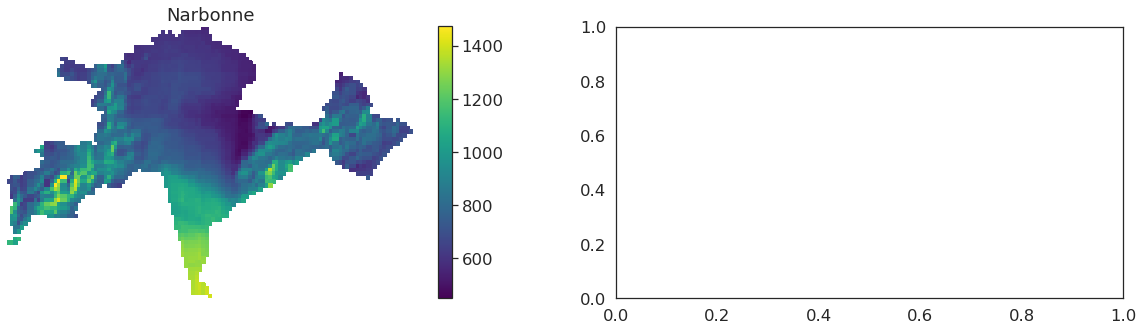

In [17]:
name='Narbonne'
toulouse_clipped = pre_lidar_dem.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])

f, ax = plt.subplots(1,2,figsize=(20, 5))
toulouse_clipped.plot(ax=ax[0], )
ax[0].set(title=name)
ax[0].set_axis_off()
plt.show()

In [19]:
solar_path = "/home/jovyan/work/PVOUT.tif"

# Define relative path to file

solar_raster = rxr.open_rasterio(solar_path,
                                 masked=True)
solar_raster.rio.bounds()

(-6.0, 40.99999999999999, 10.0, 52.0)

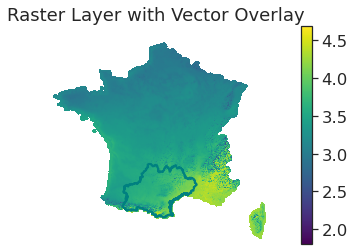

In [20]:
f, ax = plt.subplots(figsize=(11, 4))

solar_raster.squeeze().plot.imshow(cmap="viridis",
                        ax=ax)
gdf.plot(color='None', 
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax,
                    zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()

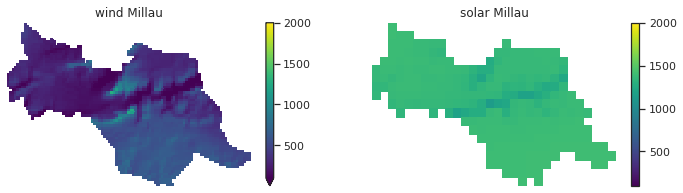

In [21]:
sns.set(font_scale=1, style="white")

name='Millau'
sol_clipped = solar_raster.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])*365

wind_clipped = pre_lidar_dem.rio.clip(communes_df[communes_df['nom']==name].iloc[0]['geometry'])

f, ax = plt.subplots(1,2,figsize=(12, 3))
wind_clipped.plot(ax=ax[0], vmin=100, vmax=2000 )
ax[0].set(title=f'wind {name}')
ax[0].set_axis_off()
sol_clipped.plot(ax=ax[1], vmin=100, vmax=2000 )
ax[1].set(title=f'solar {name}')
ax[1].set_axis_off()

plt.show()

In [126]:
sns.set(font_scale=1, style="white")

communes=list(communes_df['nom'])

solar_mean=[]
wind_mean=[]
for index,c in communes_df.iterrows():
    try:
        print(f'{len(solar_mean)},{len(wind_mean)}',end='')
        sol_clipped = solar_raster.rio.clip(c['geometry'])*365
        wind_clipped = pre_lidar_dem.rio.clip(c['geometry'])
        sol_b=np.nanmean(sol_clipped.data)
        wind_b=np.nanmean(wind_clipped.data)
        solar_mean.append(sol_b)
        wind_mean.append(wind_b)
    except Exception as e:
        solar_mean.append(np.nan)
        wind_mean.append(np.nan)


0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
148 148
149 149
150 150
151 151
152 

In [127]:
len(solar_mean)

4669

In [128]:
communes_df.shape

(4669, 5)

In [129]:
communes_df['solar_mean']=solar_mean

In [130]:
communes_df['windr_mean']=wind_mean

In [131]:
communes_df

insee                  nom                         wikipedia  surf_ha  \
0     65396          Saint-Savin  fr:Saint-Savin (Hautes-Pyrénées)    386.0   
1     65001                Adast                          fr:Adast    105.0   
2     65349               Ourdon                         fr:Ourdon    279.0   
3     65351                Ousté                          fr:Ousté    240.0   
4     32222               Magnan                  fr:Magnan (Gers)   1143.0   
...     ...                  ...                               ...      ...   
4664  66093  Laroque-des-Albères            fr:Laroque-des-Albères   2063.0   
4665  66196               Sorède                         fr:Sorède   3444.0   
4666  66008      Argelès-sur-Mer                fr:Argelès-sur-Mer   5904.0   
4667  66016      Banyuls-sur-Mer                fr:Banyuls-sur-Mer   4279.0   
4668  66048              Cerbère  fr:Cerbère (Pyrénées-Orientales)    824.0   

                                               geometry   solar_mean  \
0     MULTIPOLYGON (((-0.10546 42.97391, -0.10403 42...  1223.236694   
1     MULTIPOLYGON (((-0.08529 42.97579, -0.08409 42...  1229.867554   
2     MULTIPOLYGON (((-0.02632 43.03353, -0.02594 43...  1162.598022   
3     MULTIPOLYGON (((-0.02766 43.04471, -0.02744 43...  1164.532471   
4     MULTIPOLYGON (((-0.14316 43.75996, -0.14304 43...  1290.548706   
...                                                 ...          ...   
4664  MULTIPOLYGON (((2.90989 42.51304, 2.90996 42.5...  1409.189941   
4665  MULTIPOLYGON (((2.94713 42.48215, 2.94748 42.4...  1378.191772   
4666  MULTIPOLYGON (((2.97030 42.53088, 2.97035 42.5...  1444.185913   
4667  MULTIPOLYGON (((3.04055 42.47458, 3.05137 42.4...  1432.723022   
4668  MULTIPOLYGON (((3.12055 42.44292, 3.12095 42.4...  1451.015381   

       windr_mean  
0      182.225082  
1      128.549500  
2      253.124252  
3      165.838821  
4      235.303177  
...           ...  
4664   549.905273  
4665   843.951355  
4666   793.878845  
4667  1460.911011  
4668  2159.693359  

[4669 rows x 7 columns]

In [132]:
communes_df.to_file("communes_potentiel.geojson", driver='GeoJSON')

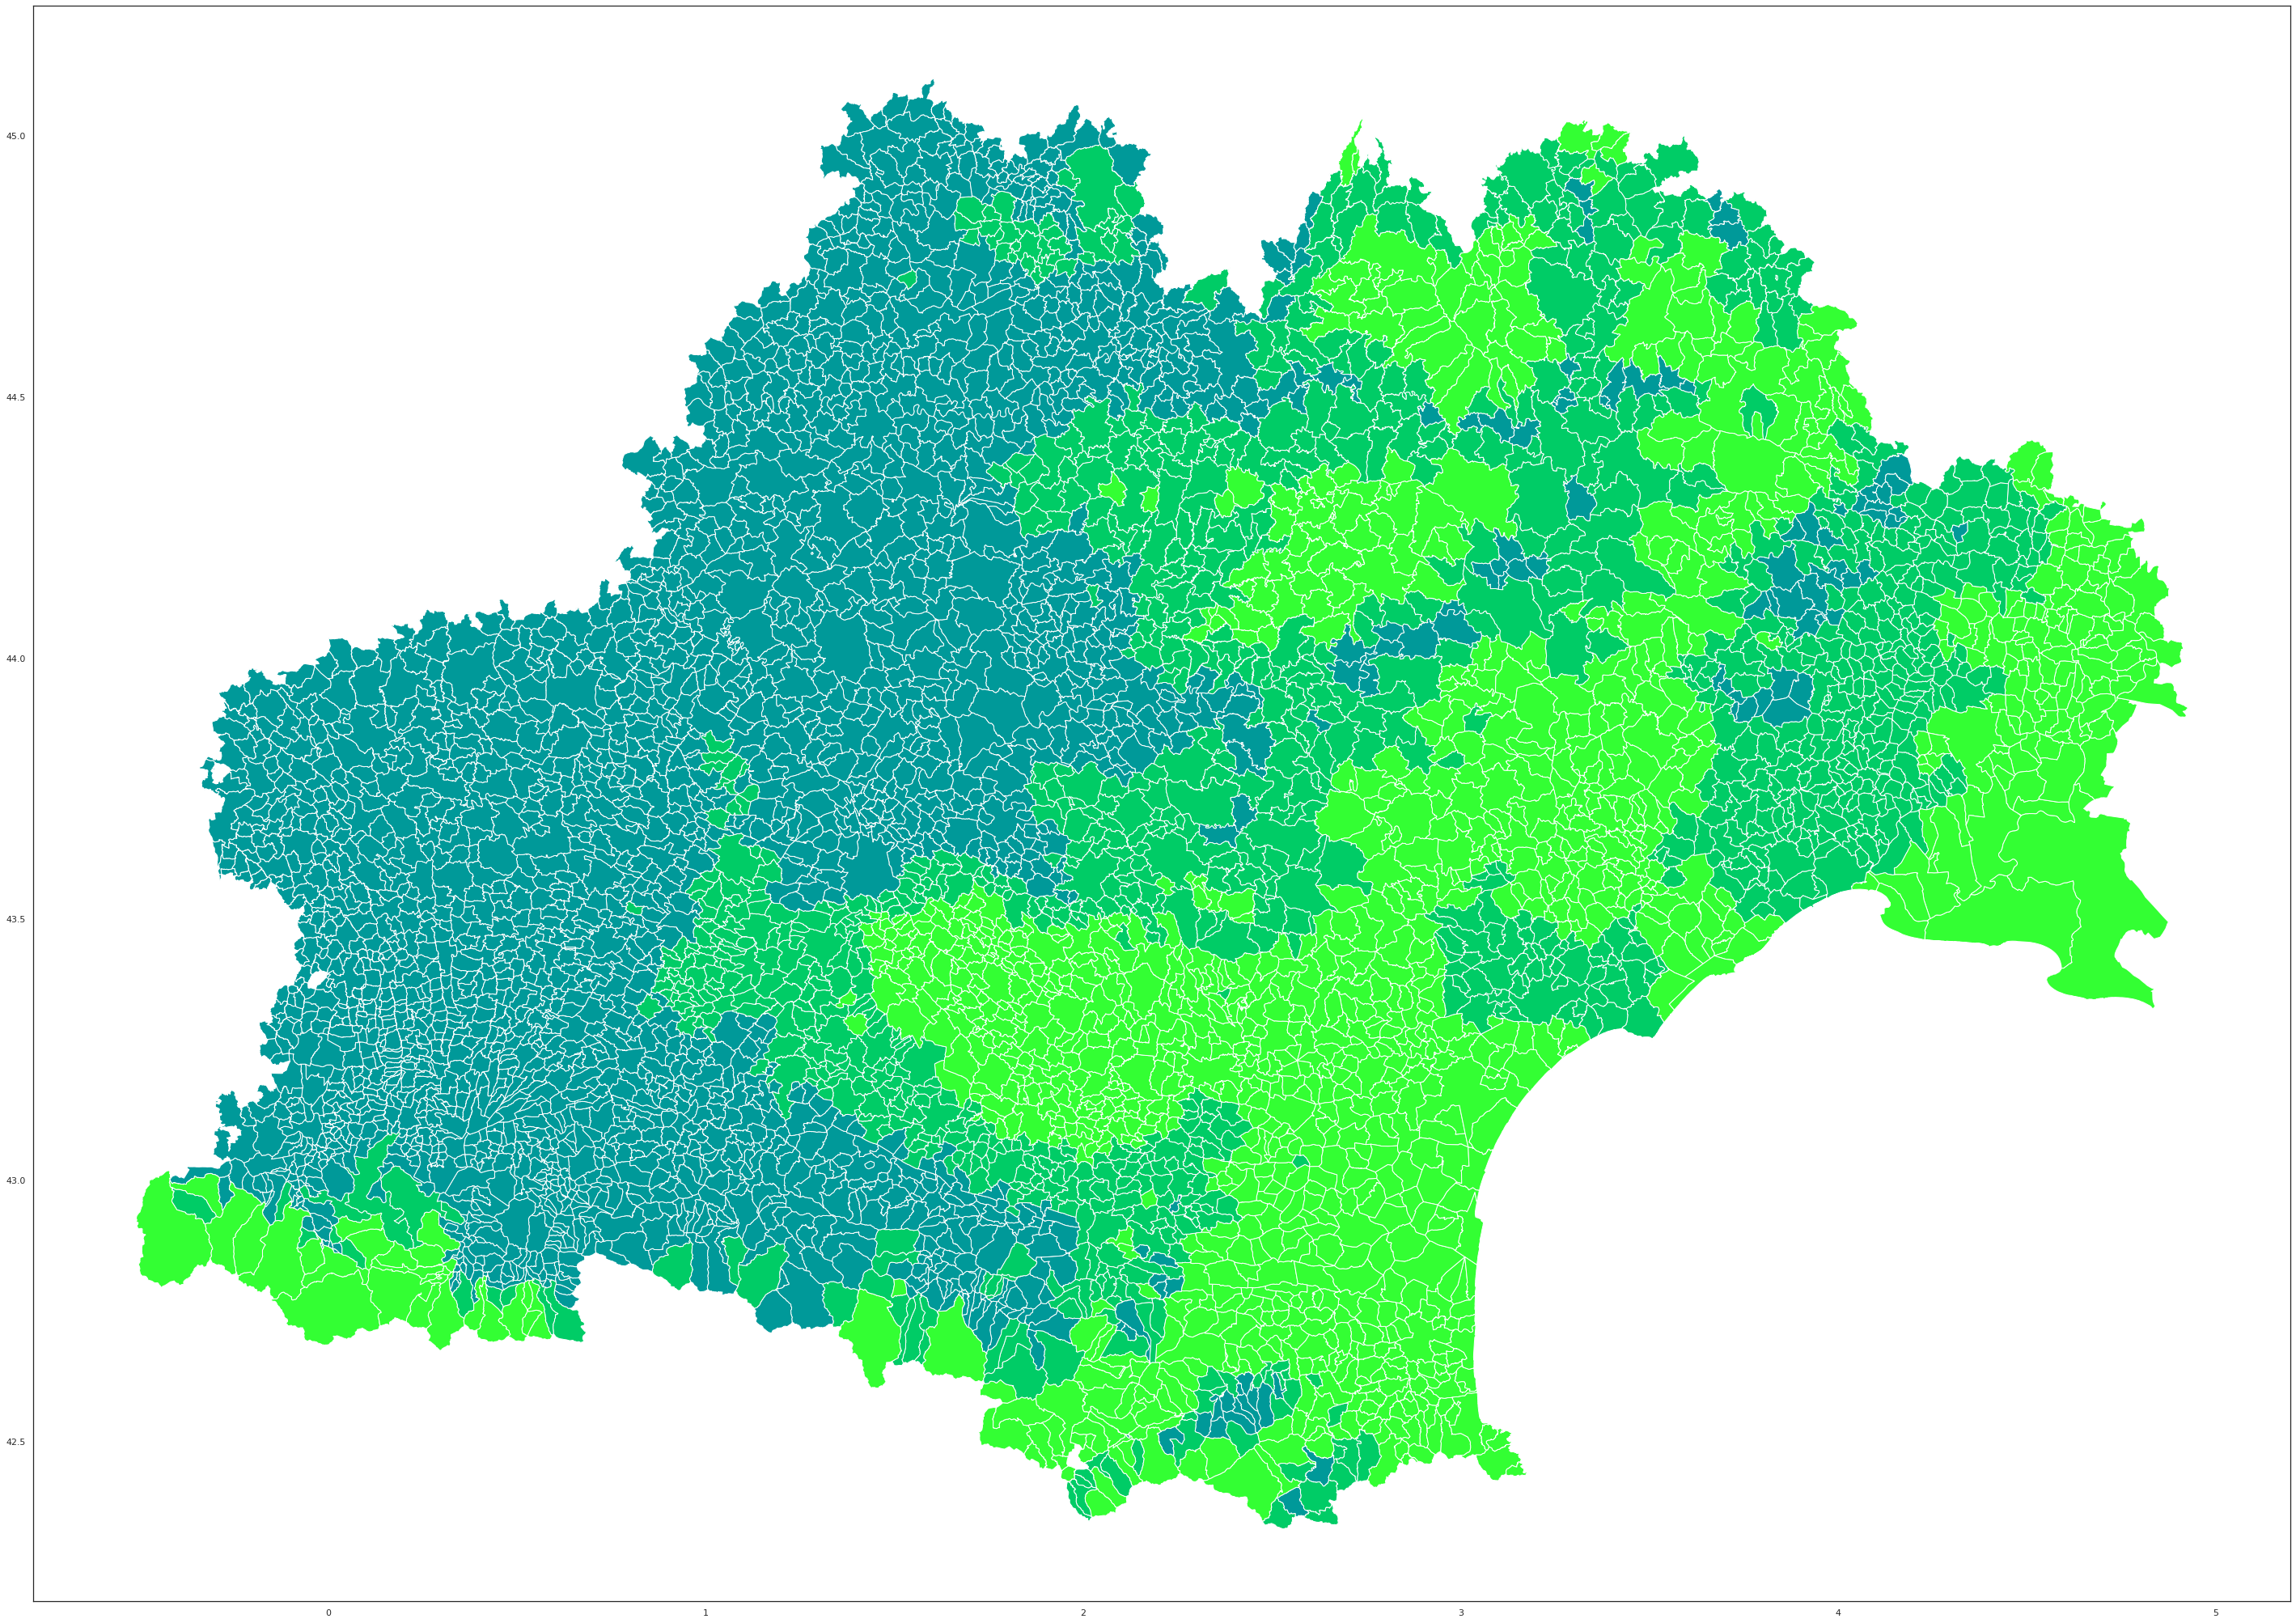

In [166]:
def select_color(row):
    insee  = row['solar_mean']+row['windr_mean']
    if insee <= 1685:
        return '#009999'
    elif insee >= 1877:
        return '#33FF33'
    else:
        return '#00CC66'
    
df=communes_df.fillna(0.)
df['color'] = df.apply(lambda x: select_color(x), axis =1)
df['geometry'].plot(
    figsize=(50, 60),
    color=df['color']
)

#66FF00	66FF33	66FF66	66FF99	66FFCC	66FFFF

In [133]:
communes_df.describe()

surf_ha   solar_mean   windr_mean
count   4669.000000  4664.000000  4664.000000
mean    1693.639966  1356.535852   390.830766
std     2142.885607    74.993915   208.763075
min       28.000000  1058.317505    29.647856
25%      680.000000  1311.490173   245.377968
50%     1138.000000  1336.017822   318.531830
75%     2035.000000  1384.060944   488.670158
max    75781.000000  1648.395996  2159.693359

In [135]:
communes_df.fillna(0.)

insee                  nom                         wikipedia  surf_ha  \
0     65396          Saint-Savin  fr:Saint-Savin (Hautes-Pyrénées)    386.0   
1     65001                Adast                          fr:Adast    105.0   
2     65349               Ourdon                         fr:Ourdon    279.0   
3     65351                Ousté                          fr:Ousté    240.0   
4     32222               Magnan                  fr:Magnan (Gers)   1143.0   
...     ...                  ...                               ...      ...   
4664  66093  Laroque-des-Albères            fr:Laroque-des-Albères   2063.0   
4665  66196               Sorède                         fr:Sorède   3444.0   
4666  66008      Argelès-sur-Mer                fr:Argelès-sur-Mer   5904.0   
4667  66016      Banyuls-sur-Mer                fr:Banyuls-sur-Mer   4279.0   
4668  66048              Cerbère  fr:Cerbère (Pyrénées-Orientales)    824.0   

                                               geometry   solar_mean  \
0     MULTIPOLYGON (((-0.10546 42.97391, -0.10403 42...  1223.236694   
1     MULTIPOLYGON (((-0.08529 42.97579, -0.08409 42...  1229.867554   
2     MULTIPOLYGON (((-0.02632 43.03353, -0.02594 43...  1162.598022   
3     MULTIPOLYGON (((-0.02766 43.04471, -0.02744 43...  1164.532471   
4     MULTIPOLYGON (((-0.14316 43.75996, -0.14304 43...  1290.548706   
...                                                 ...          ...   
4664  MULTIPOLYGON (((2.90989 42.51304, 2.90996 42.5...  1409.189941   
4665  MULTIPOLYGON (((2.94713 42.48215, 2.94748 42.4...  1378.191772   
4666  MULTIPOLYGON (((2.97030 42.53088, 2.97035 42.5...  1444.185913   
4667  MULTIPOLYGON (((3.04055 42.47458, 3.05137 42.4...  1432.723022   
4668  MULTIPOLYGON (((3.12055 42.44292, 3.12095 42.4...  1451.015381   

       windr_mean  
0      182.225082  
1      128.549500  
2      253.124252  
3      165.838821  
4      235.303177  
...           ...  
4664   549.905273  
4665   843.951355  
4666   793.878845  
4667  1460.911011  
4668  2159.693359  

[4669 rows x 7 columns]

In [141]:
communes_df['sum_pot']=communes_df['solar_mean']+communes_df['windr_mean']
communes_df['sum_pot_pond']=communes_df['sum_pot']*communes_df['surf_ha']

In [143]:
communes_df.describe()

surf_ha   solar_mean   windr_mean      sum_pot  sum_pot_pond
count   4669.000000  4664.000000  4664.000000  4664.000000  4.664000e+03
mean    1693.639966  1356.535852   390.830766  1747.366618  3.065512e+06
std     2142.885607    74.993915   208.763075   249.786626  4.435643e+06
min       28.000000  1058.317505    29.647856  1160.818550  8.239768e+04
25%      680.000000  1311.490173   245.377968  1564.299240  1.153675e+06
50%     1138.000000  1336.017822   318.531830  1685.048721  1.984872e+06
75%     2035.000000  1384.060944   488.670158  1877.870453  3.631651e+06
max    75781.000000  1648.395996  2159.693359  3610.708740  1.750620e+08

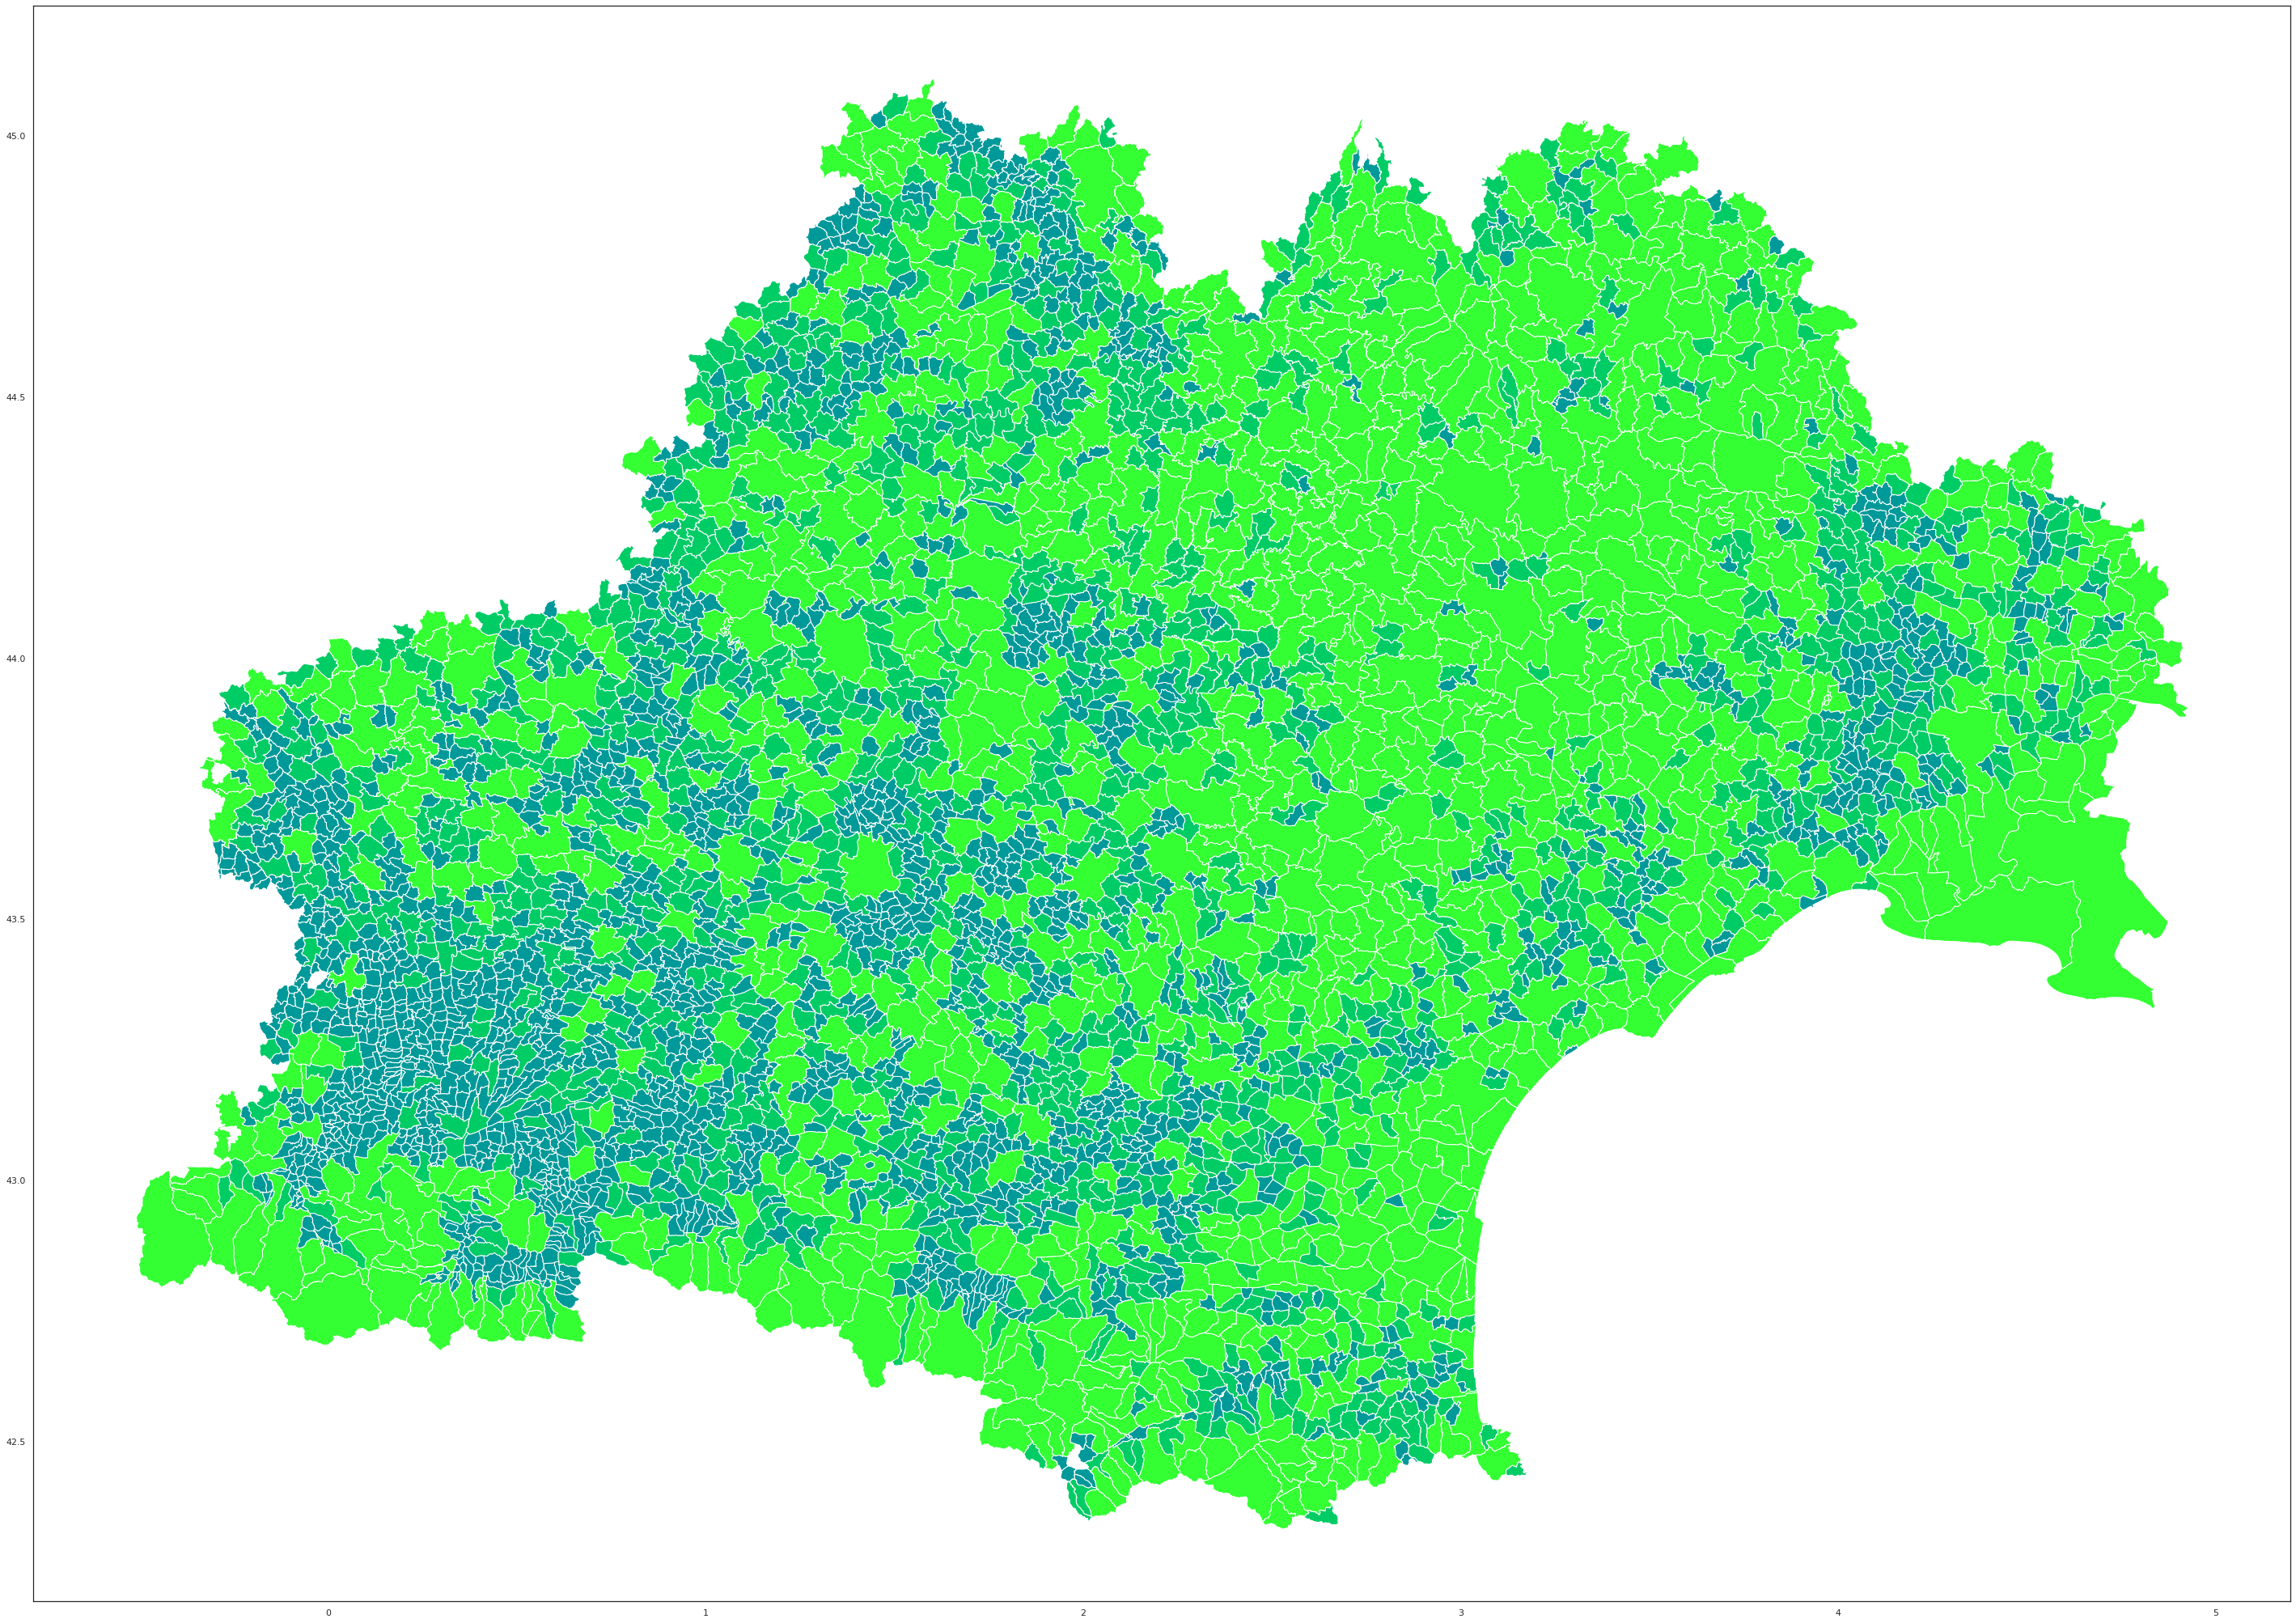

In [167]:
def select_color(row):
    insee  = row['sum_pot_pond']
    if insee <= 1.94872e+06:
        return '#009999'
    elif insee >= 3.631651e+06:
        return '#33FF33'
    else:
        return '#00CC66'
    
df=communes_df.fillna(0.)
df['color'] = df.apply(lambda x: select_color(x), axis =1)
df['geometry'].plot(
    figsize=(50, 60),
    color=df['color'],

)

